**1- Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Splitting dataframes into training set and test set
from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrixmport the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

There are 5000 rows and 14 columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Non-Null Counts are the same for each column. So, there is no missing values.

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

It is confirmed that there is no missing values.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


The results show that there are discrepiancies on the Experience data. Experience should not be negative. Yet, minimum experience reads -3 above. Therefore, it is better to analyze before making any decision to make changes on negative value(s).

In [7]:
#Number of customer with zero and negative values
df[df['Experience']<=0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
105,106,24,0,35,94704,3,0.10,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.50,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.60,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.40,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,4902,26,0,54,96094,3,1.10,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.60,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.10,2,0,0,0,0,1,0
4957,4958,29,-1,50,95842,2,1.75,3,0,0,0,0,0,1


There are 118 zero or negative values as Experience.

In [8]:
#Zero-experience data statistics
zero_experience = df[df['Experience']==0]
zero_experience.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,66.0,2878.272727,1677.198191,106.0,1436.75,3263.50,4376.00,4990.0
Age,66.0,25.636364,1.145377,24.0,25.00,26.00,26.00,30.0
Experience,66.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
Income,66.0,69.651515,46.261961,12.0,38.00,53.50,90.25,195.0
ZIP Code,66.0,93251.136364,1822.507308,90028.0,92044.25,93558.00,94588.50,96094.0
Family,66.0,2.787879,1.102656,1.0,2.00,3.00,4.00,4.0
CCAvg,66.0,1.973939,1.946700,0.1,0.90,1.55,2.00,7.2
Education,66.0,2.181818,0.821052,1.0,1.25,2.00,3.00,3.0
Mortgage,66.0,41.106061,86.726294,0.0,0.00,0.00,0.00,323.0
Personal Loan,66.0,0.106061,0.310275,0.0,0.00,0.00,0.00,1.0


In [9]:
#(-1)-experience data statistics
minus1_experience = df[df['Experience']==-1]
minus1_experience.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,33.0,2220.393939,1457.734071,90.0,671.0,2431.0,3293.0,4958.00
Age,33.0,24.848485,1.563674,23.0,24.0,25.0,25.0,29.00
Experience,33.0,-1.000000,0.000000,-1.0,-1.0,-1.0,-1.0,-1.00
Income,33.0,64.454545,36.955286,12.0,39.0,61.0,82.0,149.00
ZIP Code,33.0,93622.484848,1389.972372,90089.0,92647.0,94010.0,94720.0,95842.00
Family,33.0,3.030303,1.015038,1.0,2.0,3.0,4.0,4.00
CCAvg,33.0,1.796364,1.101107,0.2,1.0,1.8,2.3,6.33
Education,33.0,2.030303,0.847233,1.0,1.0,2.0,3.0,3.00
Mortgage,33.0,54.393939,101.389392,0.0,0.0,0.0,84.0,314.00
Personal Loan,33.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00


There are 33 observations with (-1) experience. Their average income is about 64,000 compared to all data average income of 74,000.

In [10]:
#(-2)-experience data statistics
minus2_experience = df[df['Experience']==-2]
minus2_experience.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,15.0,2526.800000,1527.937648,316.0,842.0,2877.0,3842.5,4482.0
Age,15.0,24.066667,1.222799,23.0,23.5,24.0,24.0,28.0
Experience,15.0,-2.000000,0.000000,-2.0,-2.0,-2.0,-2.0,-2.0
Income,15.0,82.466667,35.205249,35.0,50.5,80.0,100.0,150.0
ZIP Code,15.0,92724.800000,1877.555447,90065.0,91105.0,92634.0,94426.0,95422.0
Family,15.0,2.400000,0.736788,2.0,2.0,2.0,2.5,4.0
CCAvg,15.0,2.656667,2.410162,0.3,1.6,1.8,2.2,7.2
Education,15.0,2.133333,0.833809,1.0,1.5,2.0,3.0,3.0
Mortgage,15.0,21.800000,64.051542,0.0,0.0,0.0,0.0,238.0
Personal Loan,15.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


There are 15 observations with (-2) experience. Their average income is about 82,000 compared to all data average income of 74,000.

In [11]:
#(-3)-experience data statistics
minus3_experience = df[df['Experience']==-3]
minus3_experience.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4.0,3761.75,849.756583,2619.0,3375.00,3956.5,4343.25,4515.0
Age,4.0,23.50,0.577350,23.0,23.00,23.5,24.00,24.0
Experience,4.0,-3.00,0.000000,-3.0,-3.00,-3.0,-3.00,-3.0
Income,4.0,68.25,54.950736,28.0,37.75,48.0,78.50,149.0
ZIP Code,4.0,92029.00,1485.038944,90089.0,91348.25,92236.0,92916.75,93555.0
Family,4.0,3.25,0.957427,2.0,2.75,3.5,4.00,4.0
CCAvg,4.0,2.90,2.941655,1.0,1.00,1.7,3.60,7.2
Education,4.0,2.25,0.957427,1.0,1.75,2.5,3.00,3.0
Mortgage,4.0,36.25,72.500000,0.0,0.00,0.0,36.25,145.0
Personal Loan,4.0,0.00,0.000000,0.0,0.00,0.0,0.00,0.0


There are only 4 observations with (-3) experience. Their average income is about 55,000 compared to all data average income of about 74,000.

Conclusion: Those customers who have negative experiences have annual incomes which do not have much difference from the all customers (5000 obsercations) data. Some of them have enough savings to purchase a house as well. I assume that if they have income they should have a job and related experience. I also assume that people with zero experience means that they are still in their first year period.
Therefore;
1) I will change all negative experiences (only 52 observations) to positive ones assuming an human error and continue doing analysis, then
2) I will delete those 52 observations and do the logistic regression analysis again to see any significant change. I do not expect any major differences because out of 5000 observations, only 57 observations are not critical.

In [12]:
#Changing negative signs to positive on the Experience column
df['Experience'] = df['Experience'].abs()

**2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate
Get data model ready

In [13]:
#Number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

Family is a categorical variable as it has only 4 unique values.
Education is a categorical variable as it has only 3 unique values.
Personal Loan is a categorical variable as it has only 2 unique values.
Securities Account is a categorical variable as it has only 2 unique values.
CD Account is a categorical variable as it has only 2 unique values.
Online is a categorical variable as it has only 2 unique values.
CreditCard is a categorical variable as it has only 2 unique values.


In [14]:
# Dropping ID and ZIP Code columns
df = df.drop(['ID', 'ZIP Code'], axis =1 ) 

ID: ID column has all unique values with 5000 categories, one for each row. It should not be in our analysis because it is not considered as an explanatory variable for our outcome.
ZIP Code: Living area (location) might be an effective factor for individuals who are willing or qualify for personal loan. However, the location information in the data set is not given as region -categorical variable, but 467 different ZIP Codes. ZIP codes are numeric and it is meaningless to add them to the equation. 
Therefore, It would be better to remove both the ID and ZIp Code columns.

In [15]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


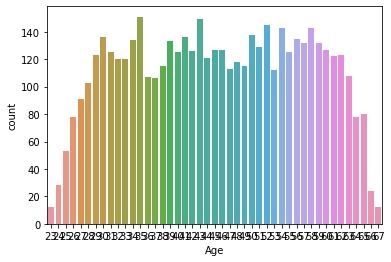

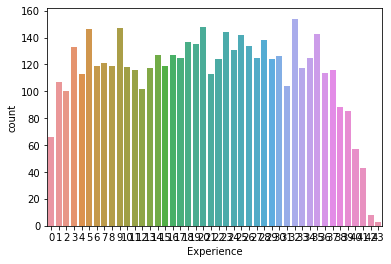

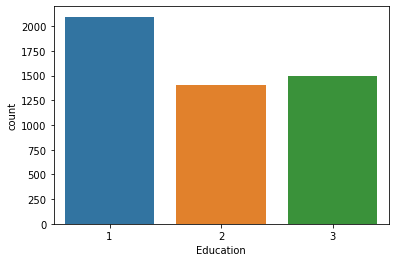

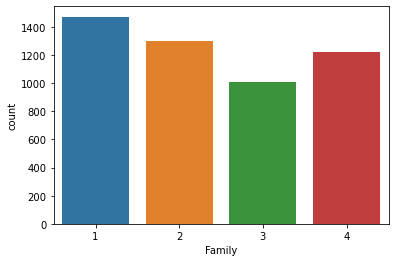

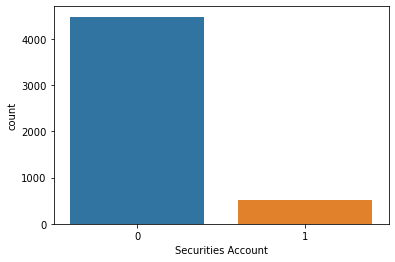

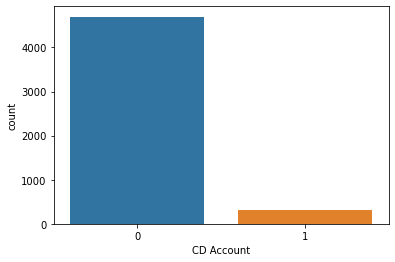

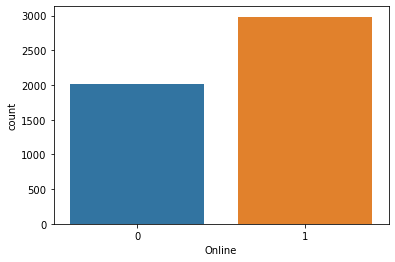

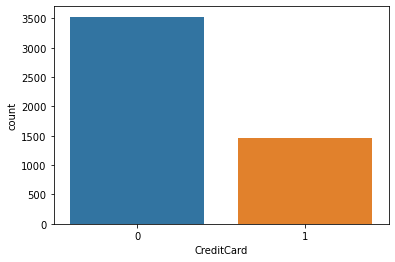

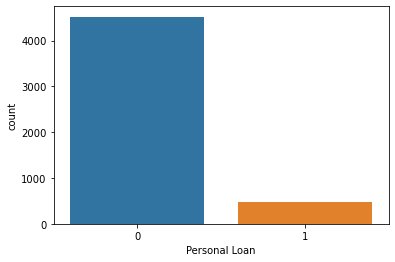

In [16]:
for i in ['Age', 'Experience','Education','Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']:
      sns.countplot(df[i])
      plt.show()

The plots above show that CD account and Securities Account holders are significantly lower in the sample. Most importantly, the target variable-Personal Loan is imbalanced.

In [17]:
#Identfying the data imbalance
any_imbalance = df['Personal Loan'].value_counts(normalize=True)
print(any_imbalance)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


As it is mentioned, target variable is higly imbalanced; 90.4 percent vs. 9.6 percent. It should be fixed!

In [18]:
for i in list(df.columns):   # checking value counts 
    print(df[i].value_counts(normalize=True))
    print()

35    0.0302
43    0.0298
52    0.0290
58    0.0286
54    0.0286
50    0.0276
41    0.0272
30    0.0272
56    0.0270
34    0.0268
39    0.0266
59    0.0264
57    0.0264
51    0.0258
60    0.0254
45    0.0254
46    0.0254
42    0.0252
40    0.0250
31    0.0250
55    0.0250
62    0.0246
29    0.0246
61    0.0244
44    0.0242
32    0.0240
33    0.0240
48    0.0236
38    0.0230
49    0.0230
47    0.0226
53    0.0224
63    0.0216
36    0.0214
37    0.0212
28    0.0206
27    0.0182
65    0.0160
64    0.0156
26    0.0156
25    0.0106
24    0.0056
66    0.0048
23    0.0024
67    0.0024
Name: Age, dtype: float64

32    0.0308
20    0.0296
9     0.0294
5     0.0292
23    0.0288
35    0.0286
25    0.0284
28    0.0276
18    0.0274
19    0.0270
26    0.0268
3     0.0266
24    0.0262
16    0.0254
14    0.0254
30    0.0252
34    0.0250
27    0.0250
17    0.0250
22    0.0248
29    0.0248
7     0.0242
6     0.0238
8     0.0238
15    0.0238
10    0.0236
33    0.0234
13    0.0234
37    0.0232
11    0.023

In [19]:
print ('---------------------------------')
#Number of customer with zero mortgage
zero_mortgages = df[df['Mortgage']==0].count()
print('The number of people with zero mortgage is', zero_mortgages['Mortgage'],'.')

#Number of customer with zero credit card spending per month
zero_spending = df[df['CCAvg']==0].count()
print('The number of customer with zero credit card spending per month is', zero_spending['CCAvg'],'.')

#Number of customer doesn't have CD Account
no_CD = df[df['CD Account']==0].count()
print('The number of customer does not have CD account', no_CD['CD Account'],'.')

#Number of customer doesn't use Internet Banking
no_Internet_Banking = df[df['Online']==0].count()
print('The number of customer does not have Internet_Banking', no_Internet_Banking['Online'],'.')

#Number of customer doesn't have Securities Account
no_Securities_Account = df[df['Securities Account']==0].count()
print('The number of customer does not have Securities Account', no_Securities_Account['Securities Account'],'.')
print ('---------------------------------')


---------------------------------
The number of people with zero mortgage is 3462 .
The number of customer with zero credit card spending per month is 106 .
The number of customer does not have CD account 4698 .
The number of customer does not have Internet_Banking 2016 .
The number of customer does not have Securities Account 4478 .
---------------------------------


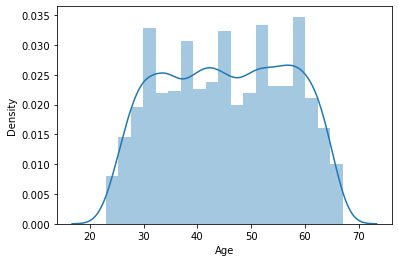

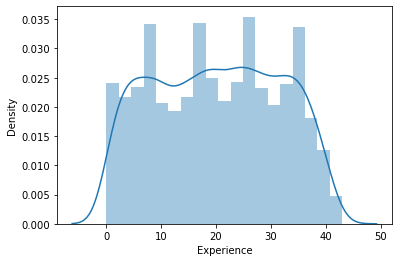

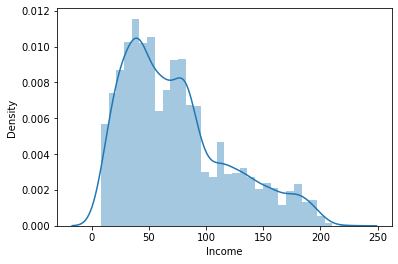

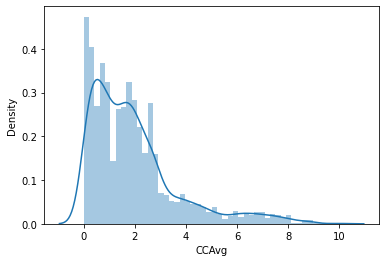

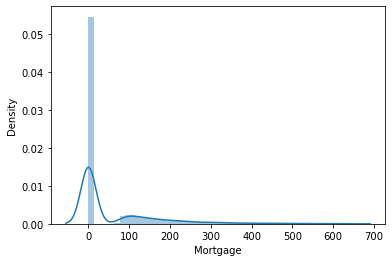

In [20]:
# distplot for continous columns
for i in ['Age','Experience','Income','CCAvg','Mortgage']:
    sns.distplot(df[i])
    plt.show()

Except the Age and Experience, the other continues variables are skewed to the right. Let's look at value-counts of them again below. 

In [21]:
df['Income'].value_counts(normalize=True)

44     0.0170
38     0.0168
81     0.0166
41     0.0164
39     0.0162
        ...  
189    0.0004
202    0.0004
205    0.0004
224    0.0002
218    0.0002
Name: Income, Length: 162, dtype: float64

There is some degree of skewness in the income distribution, and value_count results confirm it. I do hesitate to drop the income variable because it is an important variable affecting customers who accept the personal loan offered. Therefore, I keep it in my dataset.

In [22]:
df['CCAvg'].value_counts(normalize=True)

0.30    0.0482
1.00    0.0462
0.20    0.0408
2.00    0.0376
0.80    0.0374
         ...  
2.75    0.0002
8.20    0.0002
9.30    0.0002
3.67    0.0002
5.33    0.0002
Name: CCAvg, Length: 108, dtype: float64

CCAvg seems to have highly skewed distribution. I believe it is also correlated with income variable (higher income-higher spending on credit card) which violates the assumption that independent variables in logistic regression should not be correlated with each other. However, income itself may not capture the changes in monthly credit card spending because consumers tend to spend more than their income, so that they might have recurring balances in their credit card account. Therefore, I would rather to further examine it creating a correlation matrix.

In [23]:
# It will show correlation matrix 
df.corr() 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


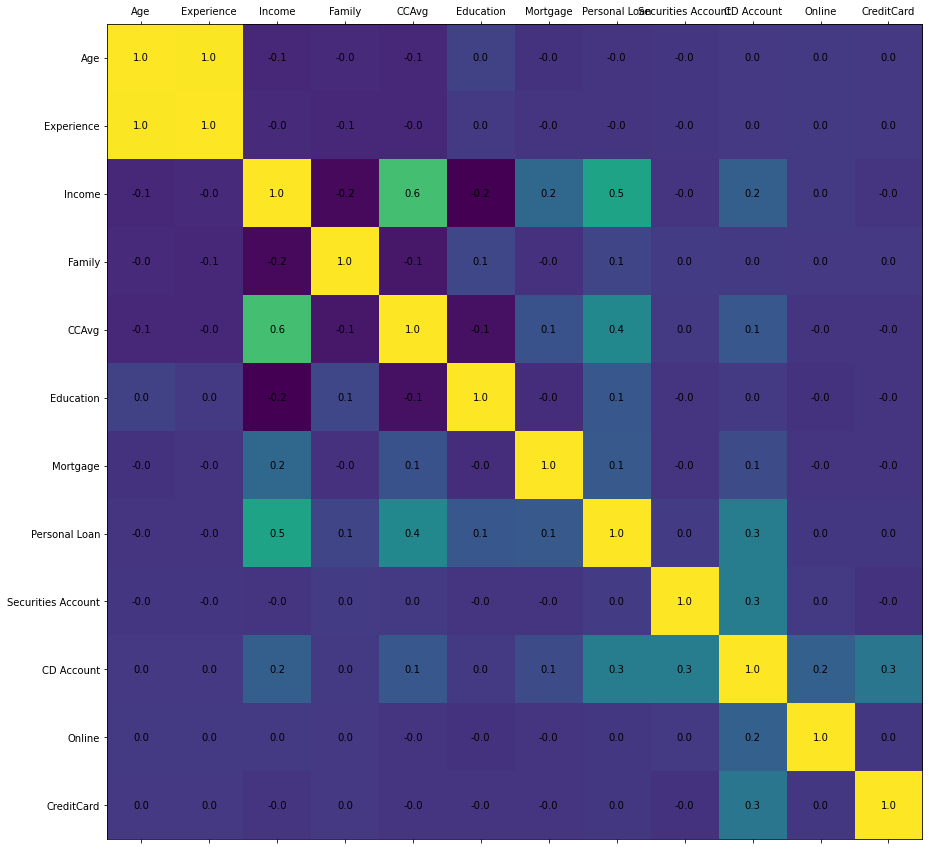

In [24]:
# Correlation in graphical representation to visualize and catch any correlation
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(df)

As I expected, there is a correlation between Income and CCAvg; correlation coefficient equals to 0.60, and its distribution is highly skewed. I do not expect that CCAvg plays a significant role on explaining the target variable. Therefore, I would prefer to drop it from the dataset.
On the other hand, both correlation matrix and heatmap show that there is almost perfect correlation between Age and Experience (corr.coeff=0.94). I should drop one of them. Considering the discrepiancies in the dataset explained above, I would drop the Experience but keep the Age variable.

In [25]:
df.drop(['CCAvg'], axis=1, inplace=True)
df.drop(['Experience'], axis=1, inplace=True)

In [26]:
df['Mortgage'].value_counts(normalize=True)

0      0.6924
98     0.0034
103    0.0032
119    0.0032
83     0.0032
        ...  
541    0.0002
509    0.0002
505    0.0002
485    0.0002
577    0.0002
Name: Mortgage, Length: 347, dtype: float64

Majority of mortgage values are zero (69%). The rest of the categories have a very small percentage. So, I do not expect any additional value added to the analysis. Therefore, I drop the Mortgage variable from the dataset too.

In [27]:
df.drop(['Mortgage'], axis=1, inplace=True)

In [28]:
df.head()

,Age,Income,Family,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,0,1,0,0,0
1,45,34,3,1,0,1,0,0,0
2,39,11,1,1,0,0,0,0,0
3,35,100,1,2,0,0,0,0,0
4,35,45,4,2,0,0,0,0,1


Bivariate Analysis
-Target variable is 'Personal Loan'. The following is to understand how the data is distributed amongst the other variables.

In [29]:
df.groupby(["Personal Loan"]).mean()

,Age,Income,Family,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,
0,45.367257,66.237389,2.373451,1.843584,0.102212,0.035841,0.595796,0.293584
1,45.066667,144.745833,2.612500,2.233333,0.125000,0.291667,0.606250,0.297917


In [30]:
df.groupby(["Personal Loan"]).median()

,Age,Income,Family,Education,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,
0,45.0,59.0,2.0,2.0,0.0,0.0,1.0,0.0
1,45.0,142.5,3.0,2.0,0.0,0.0,1.0,0.0


The above results show that there is a major difference in case of Income and CD Account with respect to target variable. Individuals having more income, CD account and credit card spending have accepted the personal loan offered. Not much mean difference in security account holders with respect to personal loan but CD account holders. It is interesting to examine! The other variables do not seem to have much difference.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 5000 non-null   int64
 1   Income              5000 non-null   int64
 2   Family              5000 non-null   int64
 3   Education           5000 non-null   int64
 4   Personal Loan       5000 non-null   int64
 5   Securities Account  5000 non-null   int64
 6   CD Account          5000 non-null   int64
 7   Online              5000 non-null   int64
 8   CreditCard          5000 non-null   int64
dtypes: int64(9)
memory usage: 351.7 KB


Get data model ready

In [32]:
# Defining X and Y variables

X = df.drop('Personal Loan', axis=1)
Y = df[['Personal Loan']]
X.head()

,Age,Income,Family,Education,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,1,0,0,0
1,45,34,3,1,1,0,0,0
2,39,11,1,1,0,0,0,0
3,35,100,1,2,0,0,0,0
4,35,45,4,2,0,0,0,1


In [33]:
Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [34]:
print(X.shape)
print(Y.shape)

(5000, 8)
(5000, 1)


In [35]:
# Converting categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], drop_first=True)
X

,Age,Income,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,49,0,0,1,0,0,1,0,0,0
1,45,34,0,1,0,0,0,1,0,0,0
2,39,11,0,0,0,0,0,0,0,0,0
3,35,100,0,0,0,1,0,0,0,0,0
4,35,45,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,0,0,0,0,1,0,0,1,0
4996,30,15,0,0,1,0,0,0,0,1,0
4997,63,24,1,0,0,0,1,0,0,0,0
4998,65,49,0,1,0,1,0,0,0,1,0


**3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [36]:
# Splitting X and Y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [37]:
# Checking the split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [38]:
y_train.value_counts()

Personal Loan
0                3158
1                 342
dtype: int64

In [39]:
y_test.value_counts()

Personal Loan
0                1362
1                 138
dtype: int64

**4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [40]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1)
logreg.fit(x_train, y_train)                    # fitting the model on train data

# Predicting the target variable on the test data
y_predict = logreg.predict(x_test)


In [41]:
# Observing the predicted and observed Personal Loan in a dataframe.

z = x_test.copy()
z['Actual Personal Loan Status'] = y_test
z['Predicted Personal Loan Status'] = y_predict
z.head()

,Age,Income,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Actual Personal Loan Status,Predicted Personal Loan Status
3406,42,34,0,1,0,0,1,0,0,0,1,0,0
757,52,81,0,1,0,1,0,1,0,0,0,0,0
3624,58,70,0,0,0,0,1,0,0,0,0,0,0
4544,28,80,0,1,0,0,0,0,0,1,0,0,0
3235,60,39,1,0,0,0,1,0,0,1,0,0,0


In [42]:
## Function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9568571428571429

Testing accuracy 0.9666666666666667

Confusion Matrix


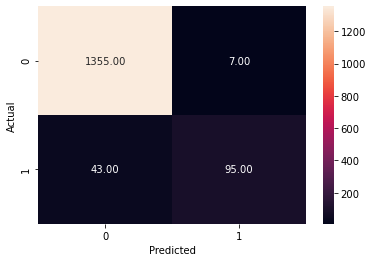

None

Recall: 0.6884057971014492

Precision: 0.9313725490196079

F1 Score: 0.7916666666666666

Roc Auc Score: 0.9734725148438996


In [43]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict)) 
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1] ))  

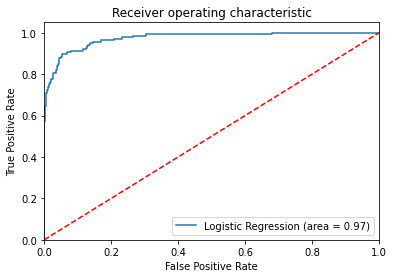

In [44]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [45]:
#Coefficients

for idx, col_name in enumerate(x_train.columns):
     coef = np.round(abs(logreg.coef_[0][idx]),2)
     print("The coefficient for {} is {}".format(col_name, logreg.coef_[0][idx]))
intercept = logreg.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Age is 0.0024834203159655667
The coefficient for Income is 0.057346996705026895
The coefficient for Family_2 is 0.0020486975397664203
The coefficient for Family_3 is 1.6837708314867195
The coefficient for Family_4 is 1.5636257874708641
The coefficient for Education_2 is 2.9308452564724865
The coefficient for Education_3 is 3.2869074104593197
The coefficient for Securities Account_1 is -0.8726144321162422
The coefficient for CD Account_1 is 3.3941103360199136
The coefficient for Online_1 is -0.5101063704212548
The coefficient for CreditCard_1 is -0.8638977292980078
The intercept for our model is -10.972106445966132


In [46]:
# Showing the output in a data frame with column names 
fi = pd.DataFrame()
fi['Col'] = x_train.columns
fi['Coeff'] = np.round((logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
8,CD Account_1,3.39
6,Education_3,3.29
5,Education_2,2.93
3,Family_3,1.68
4,Family_4,1.56
1,Income,0.06
0,Age,0.00
2,Family_2,0.00
9,Online_1,-0.51
10,CreditCard_1,-0.86


In [47]:
# Observing the actual and predicted Personal Loan in a dataframe.

z = x_test.copy()
z['Actual Personal Loan Status'] = y_test
z['Predicted Personal Loan Status'] = y_predict
type1_and_type2 = z[z['Actual Personal Loan Status'] != z['Predicted Personal Loan Status']]
type1_and_type2

,Age,Income,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Actual Personal Loan Status,Predicted Personal Loan Status
4575,53,115,1,0,0,0,1,0,0,0,0,1,0
3383,46,135,0,1,0,0,0,0,0,1,0,1,0
459,35,200,1,0,0,0,0,0,0,0,0,0,1
1731,43,125,0,1,0,0,0,0,0,1,0,1,0
3571,42,153,0,1,0,0,0,0,0,0,0,1,0
2996,42,103,0,0,0,0,0,1,1,1,1,1,0
3983,39,93,0,0,1,0,1,0,0,1,0,1,0
3612,50,99,0,0,0,0,0,1,1,0,1,1,0
183,29,148,0,1,0,0,0,0,0,1,0,1,0
2862,65,113,0,0,1,0,1,0,0,1,0,0,1


In [48]:
type1_and_type2.shape

(50, 13)

There are 52 customers in the data set where the predicted loan is not equal to the actual loan. 

**6-Give conclusion related to the Business understanding of your model? (5 marks

*Confusion matrix means

**True Positive (actual=1,predicted=1):

Predicted that personal loan will be granted and the customer is eligible for the loan

**False Positive (actual=0,predicted=1):

Predicted that personal loan will be granted and the customer is not eligibile for the loan

**True Negative (actual=0,predicted=0):

Predicted that personal loan will not be granted and the customer is not eligibile for the loan

**False Negative (actual=1,predicted=0):

Predicted that personal loan will not be granted and the customer is eligibile for loan

**Important Features

Based on the coefficient of the variables; having CD account, graduate and advanced level of education and family size of 3 and 4 influence the model's output positively. However, family size of 2, accessing to online banking, having the bank's credit card and securities account impacts the model's output negatively. So, these features help the model in predicting target variable. However, customer's income and age has very little impact on the output positively and negatively, respectfully. Mortgage variable has no affect!


**Important Metric

There is not much difference between training and testing accuracy which means that there is no overfitting. 
Recall is 0.674 which means that our model captures only 67.4% of customers who are going to accept the personal loan offered.

However, about 32.6% of customers should also supposed to get the loan offering but they will not get it due to the Type I error (FN) created by the model. That's an opportunity cost.

Precision is 93% which means that out of all positive predicted customers, 93% of them are really peronal loan taker. The rest of them (7%) should not supposed to get the loan offer but they will get it becasue of Type II error (FP) created by the model. This error might be very costly because those 7% presumably ineligible customers might accept the loan offered and default on it. Therefore, Precision is more important metric in this particular case.

Furthermore, F1 score is also high reading about 78.1% assuming that Recall and Precision are equally important.

Conclusion: Based on the results, model accuracy and testing metrics are reasonable, the model can be deployed for practical use if 7% default probability is in the limit of the bank. Needless to say, Thera Bank has a final call...